<a href="https://colab.research.google.com/github/rubyvanrooyen/ARIWS-Cookbook/blob/main/tutorials/Point_source_sensitivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Point source sensitivity

## Band limited noise

Natural radio emission from the cosmic microwave background, discrete astronomical sources, the Earth’s atmosphere, and the ground is random broadband noise that is nearly indistinguishable from the noise generated by receiver electronics.

Yet, the radio telescope's output amplitude is proportional to the flux density, S, of a point source.
This is because voltage contributions from sources such as the CMB and atmosphere are almost completely uncorrelated and average out over time, while the astronomical point sources contributes to the correlated noise.

The voltage at the output of a radio telescope is the sum of noise voltages from many independent random contributions.
The central limit theorem states that the amplitude distribution of such noise is nearly Gaussian, having RMS $V_{rms}$ and mean $<V>=0$.

Since noise power is always greater than zero, and the noise from most astronomical sources are stationary, the mean power measured from these sources are steady when averaged over much longer timescales such as minutes or hours.

It is convenient to describe noise power in units of temperature, $P_\nu=kT$, with $P_\nu$ power per unit bandwidth, noise temperature, $T$ and $k \approx 1.38 \times 10^{−23}\,$[J/K] the Boltzmann’s constant.

By averaging a large number of independent noise samples, a radio telescope can determine the average noise power with a fractional uncertainty much smaller than 1 ($\ll 1$) and detect faint sources that increase the antenna temperature by only a tiny fraction of the total noise power.

The sensitivity of a radio telescope is therefore determined by the faintest signal the telescope can detect (in other words, signal to noise ratio $\mbox{SNR} = \frac{T_{src}}{T_{rms}}$, with $T_{rms}$ the point-source RMS noise).

## What's with all the temperatures

The source temperature is defined as the brightness temperature associated with the power received by the telescope from the source you're observing, $P_\nu = 2kT_{src}$.   
Relating the power ($P_\nu$) received by the antenna at a given frequency ($\nu$) to the source temperature ($T_{src}$).

Also, power is related to observed intensity, $P_\nu = I_\nu A_e \Omega_a$, through       
$P_\nu = \int S_\nu dA \ [\mbox{erg}\  \mbox{s}^{-1}\  \mbox{Hz}^{-1}]$ and     
$S_\nu = \int I_\nu d\Omega \ [\mbox{erg}\  \mbox{s}^{-1}\  \mbox{cm}^{-2}\  \mbox{Hz}^{-1}]$.    
The fundamental unit of flux density is the Jansky: 
$ 1 \,\mbox{Jy} = 10^{-23} \, \mbox{erg}\  \mbox{s}^{-1}\  \mbox{cm}^{-2}\  \mbox{Hz}^{-1}$

Which results in the conversion between flux density and brightness temperature for an unresolved (point) source: $T_A = \left(\frac{A_e}{2k}\right)S_\nu$, with the brightness temperature just another measure of the brightness of a source.

The conversion factor between [K] and [Jy] (also known as the "forward gain" of an antenna) is then K/Jy $= \frac{A_ e}{2k}$.   
The forward gain is a physical property of a telescope, which dictates the telescope receivers’ response to a given increase in Janskys.

While the source temperature $T_{src}$ describes the energy received from the source you are interested in, the system temperature, $T_{sys}$, describes the actual power received due to both the sky and the receivers.
In order to detect the source, we need $T_{src} > T_{rms}$, where the observation-dependent quantity $T_{rms}$ is the noise in our measurement of the observation-independent quantity $T_{sys}$.
But typically $T_{sys} \gg T_{src}$, so we need to beat down the noise by averaging a large number of independent noise samples:
$ T_{rms} = \frac{T_{sys}}{\sqrt{M}}$, where $M$ is the number of independent data points.
For a telescope, the number of independent samples is $\Delta \nu \cdot \tau$ , where $\Delta \nu$ is the bandwidth (Hz) and $\tau$ is the integration time (seconds). 
Giving us the final result
$T_{rms} = \frac{T_{sys}}{\sqrt{\tau \Delta \nu }}$


## Radiometer equation applied to telescopes

Now we can write down an expression for the signal to noise ratio     
$\mbox{SNR} = \frac{T_{src}}{T_{rms}} = \frac{T_{src}}{T_{rms}}\sqrt{\tau\Delta\nu}$.

But $T_{src} = \left(\frac{A_e}{2k}\right)S_\nu$ 
and defining
$\mbox{SEFD} = \frac{2kT_{sys}}{A_e}$
the system equivalent flux density
$S_{\nu,rms} = \frac{SEFD}{\sqrt{\tau\Delta\nu}}=\sigma_S$

For an unpolarized point source of flux-density $S_\nu$, the point source sensitivity of a single antenna is   
$σ_S = \frac{2kT_{sys}}{A_e(\Delta\nu\tau)^{1/2}}$

In the limit where the antenna temperature, $T_A$, contributed by the point source is much smaller than the system noise, $T_{sys}$, the correlator output noise is $2^{1/2}$ lower than the square-law detector noise from each antenna.
For a two-element interferometer    
$\sigma_S = \frac{2^{1/2}kT_{sys}}{A_e(\Delta\nu\tau)^{1/2}}$ 

An interferometer with N dishes contains N(N−1)/2 independent two-element interferometers.
So long as the signal from each dish can be amplified coherently before it is split up to be multiplied by the signals from the N−1 other antennas, its point-source RMS noise is    
$\sigma_S = \frac{2kT_{sys}}{A_e[N(N−1)\Delta\nu\tau]^{1/2}}$.


The geometric area of a single dish is just $\pi D^2/4$, while the geometric area of an interferometer with N dishes is $N \pi D^2/4$ and can thus be arbitrarily large.
As we can see by combining the independent correlator output of a two-element interferometer we obtain a total point source sensitivity equivalent to the sensitivity of a single dish whose area equals the total area of the two-element interferometer.
For an interferometer with $N$ dishes containing $N(N−1)/2$ independent two-element interferometers, the total effective area becomes $[N(N−1)] \pi D^2/4$.
In the limit of large $N$, $[N(N−1)]^{1/2} \rightarrow N$ and the point-source sensitivity of an interferometer approaches that of a single antenna whose area equals the total effective area $NA_e$ of the $N$ interferometer antennas.


## Continuum sensitivity

Sensitivity is very crucial for preparing technically sound observation proposal to conduct sensible science.

All values for MeerKAT can be found on the user operational pages via the SARAO website:     
https://science.ska.ac.za/meerkat

In [ ]:
import numpy as np
import scipy.constants as phys

The effective collecting area of the telescope, $A_e = \eta_a A$, with $A=\pi r^2$ the geometrical antenna area and $\eta_a$ the antenna efficiency.

In [ ]:
eta_a = 0.97 # 97% efficiency for antenna and feed horn unit at L-band
d = 13.5  # m
Dcm = d*100  # 1m = 100cm
A = np.pi * (Dcm/2)**2
Ae = eta_a * A

System equivalent flux density and forward gain    

* $SEFD_e = \eta_s \frac{2kT_{sys}}{A_e} = \eta_s \frac{T_{sys}}{K}$, with $\eta_s$ the system efficiency, which accounts for various losses in the electronics and digital equipment.

* $K = \frac{Ae}{2k}$, with $k$ the Boltzmann constant and the factor 2 accounts for the fact that a single channel receiver is only able to accept half of the total radiation from an unpolarised source.


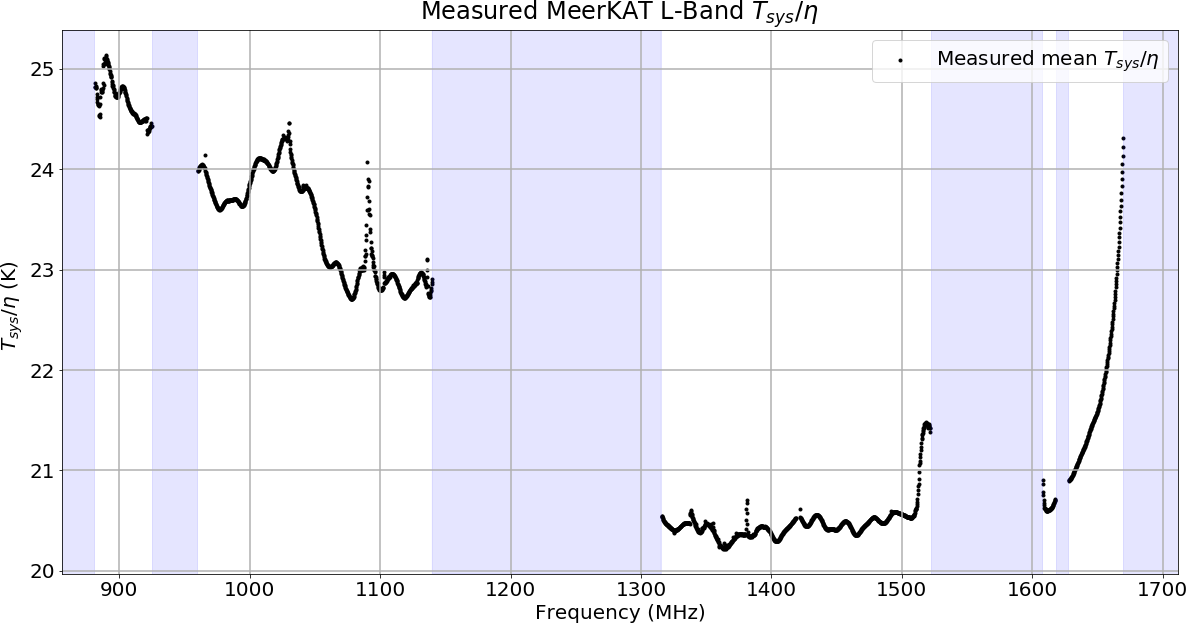

$k = 1.380649 \times 10^{−23}$ J/K, SI by definition, J/K = m2⋅kg/(s2⋅K) in SI base units    
$k = 1.380649 \times 10^{−16}$ erg/K, CGS system, 1 erg = 1×10−7 J

Flux density in Jansky. $\mbox{Jy} = 10^{-23} erg\  s^{-1}\  cm^{-2}\  Hz^{-1}$

In [ ]:
k = phys.k * 1e7  # ergs/K
Jy = 10**(-23)  # erg/cm^2/s/Hz
K = Ae /(2*k) * Jy  # K/Jy

Tsys = 22.  # Tsys/eta [K]
SEFD = Tsys / K  # Jy
print(f'The SEFD is around {SEFD:.2f} [Jy]')
print(f'The published SEFD for L-band around 395 [Jy], indicating close to 100% antenna efficiency')

The SEFD is around 437.53 [Jy]
The published SEFD for L-band around 395 [Jy], indicating close to 100% antenna efficiency


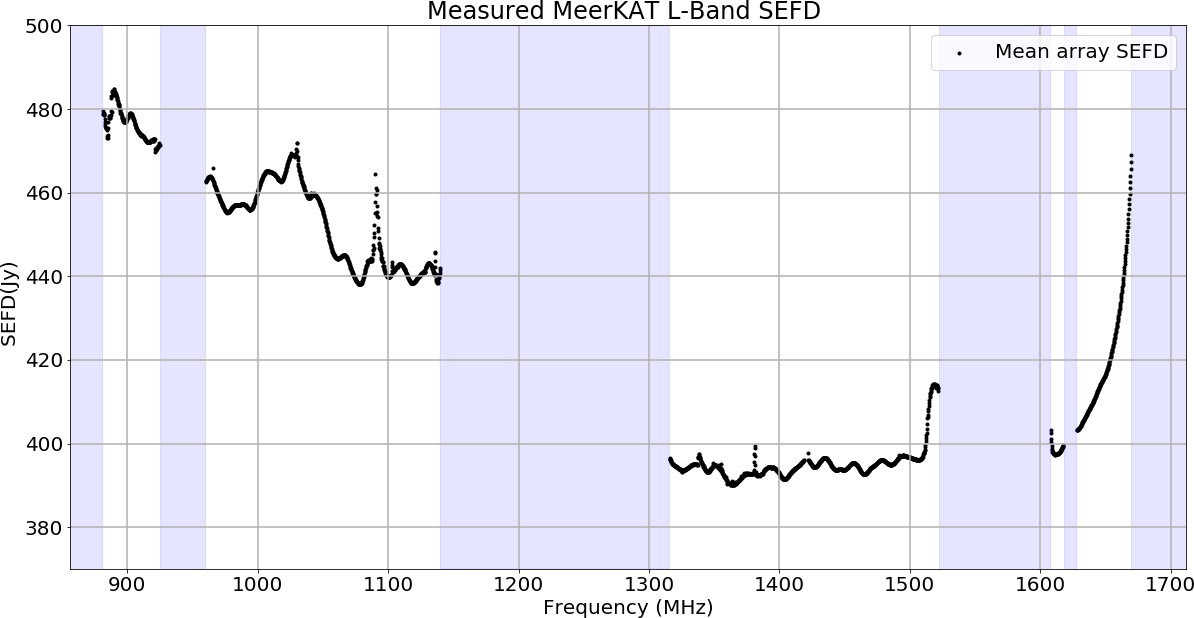

Assume the point source is at the phase center --     
point source sensitivity $\sigma_S = \frac{2kT_{sys}}{A_e[N(N−1)\tau\Delta\nu]^{1/2}} = \frac{SEFD}{[N(N−1)\tau\Delta\nu]^{1/2}}$ [Jy/beam].

In [ ]:
N = 64  # number antennas
N *=0.9  # Assume 90% or array available

t = 15.  # minute snapshot
t *= 60.  # total integration time [s]

bw = 211.328  # MHz
bw *= 1e6  # total integration bandwidth [Hz]

sigma_s = SEFD / np.sqrt(N*(N-1)*t*bw) /1e-6
print(f'Expected sensitivity = {sigma_s:.2f} [uJy/beam]')

Expected sensitivity = 17.57 [uJy/beam]


# Brightness sensitivity

Although the point-source sensitivity of an interferometer is comparable with the point-source sensitivity of a single dish having the same total area, beware that the brightness sensitivity of an interferometer is much worse because the synthesized beam solid angle of an interferometer is much smaller than the beam solid angle of a single dish of the same total effective area.

The angular resolution of an interferometer with maximum baseline b is $\approx \lambda / b$ and the angular resolution of the single dish with diameter $D$ is $\approx \lambda / D$, so the beam solid angle of the interferometer is smaller by a factor $\approx (D/b)^2$.
This is roughly the area **filling factor** of the interferometer, defined as the ratio of the area covered by all of the antennas to the area spanned by the interferometer array.

A high-resolution interferometer cannot detect a source of low surface brightness, no matter how high its total flux density.

In [ ]:
D = N * (N-1) * d  # equivalent diameter of single dish
bmax = 7700  # maximum baseline [m]
print(f'Filling factor = {D/bmax:.1e}')

Filling factor = 5.7e+00


The point-source RMS $\sigma_S$ corresponds to image flux density per beam solid angle, e.g., Jy/beam.

However, a proper spectral brightness depends only on the source.
The **spectral brightnes** specified in Jy/beam has the dimensions of spectral brightness, but beware that this is not a proper spectral brightness because it depends on the synthesized beam solid angle and not just on the radio source. The RMS brightness-temperature sensitivity $\sigma_T$ of an image made with beam solid angle $\Omega_A$ follows directly from $\sigma_S$ and the Rayleigh–Jeans approximation:     
$\sigma_T = \left(\frac{\sigma_S}{\Omega_A}\right) \frac{\lambda^2}{2k}$.    
With the beam solid angle for a Gaussian beam with HPBW $\theta_{HPBW}$    
$\Omega_A = \frac{\pi \theta^2_{HPBW}}{4\ln 2}$


Beware that a high-resolution (low $\Omega_A$) image with a good point-source sensitivity (low $\sigma_S$) may still have a poor brightness-temperature sensitivity (high $\sigma_T$).

# References
* https://www.cv.nrao.edu/~sransom/web/Ch3.html
* https://casper.ssl.berkeley.edu/astrobaki/index.php/Radiometer_Equation_Applied_to_Telescopes
